# Introduction to PowerModels, PowerModelsDistribution, and PowerModelsITD

**Author**:\
Juan Ospina,\
Scientist,\
A-1 Information Systems and Modeling Group,\
jjospina@lanl.gov

**Presented by**: David M. Fobes

LA-UR-25-20073

**Los Alamos National Laboratory Grid Science Winter School 2025**

Welcome! This tutorial will introduce you to the basics of the [PowerModels.jl](https://github.com/lanl-ansi/PowerModels.jl) (PM), [PowerModelsDistribution.jl](https://github.com/lanl-ansi/PowerModelsDistribution.jl) (PMD) and [PowerModelsITD.jl](https://github.com/lanl-ansi/PowerModelsITD.jl) (PMITD) packages. These packages are developed using the [Julia](https://julialang.org/) programming language and are based on [JuMP](https://jump.dev/JuMP.jl/stable/), so basic knowledge is assumed.

## What are these packages?
PM, PMD, and PMTID are Julia/JuMP packages for conducting steady-state power network optimization. This means we can run (or solve) power flow (PF) and optimal power flow (OPFs) optimization problems modeled in the steady-state domain. 

<img src="https://camo.githubusercontent.com/e9dbe9703f789d305a3e0f8006fc64e9474bc19f95439dc01fecd1000e0af86c/68747470733a2f2f6c616e6c2d616e73692e6769746875622e696f2f506f7765724d6f64656c732e6a6c2f6465762f6173736574732f6c6f676f2e737667" style="height:100px" /> **_PowerModels_ (PM)** : Focuses on **Transmission** systems. Single-phase (Positive sequence), balanced systems.

<img src="https://camo.githubusercontent.com/35dd704d4c5091e212e462fc7929432eb9e4725796f48c8cda1166243ac189d9/68747470733a2f2f6c616e6c2d616e73692e6769746875622e696f2f506f7765724d6f64656c73446973747269627574696f6e2e6a6c2f6465762f6173736574732f6c6f676f2e737667" style="height:100px" /> **_PowerModelsDistribution_ (PMD)** : Focuses on **Distribution** systems. Multiconductor (multiphase) unbalanced systems.


<img src="https://camo.githubusercontent.com/d8f39ffb7e1bb8975b41e0417b9cbede693b8bfd3b731b3a5e64da73af585550/68747470733a2f2f6c616e6c2d616e73692e6769746875622e696f2f506f7765724d6f64656c734954442e6a6c2f6465762f6173736574732f6c6f676f2e737667" style="height:100px" /> **_PowerModelsITD_ (PMITD)** : Focuses on **Transmission & Distribution** systems. _Single-phase-balanced--to--multiconductor-unbalanced_ systems.

## How do these packages distinguish from other tools such as OpenDSS and MATPOWER?

1. **Problem Formulations**: They allow users to evaluate multiple problem formulations, for example the _AC polar_ (voltage magnitude and angles), _AC rectangular_ (real and imaginary voltage values), _DC approximation_, _SOC relaxation_, _Current-Voltage (IV) rectangular_, etc. This means that users can solve the same problem, i.e., PF or OPF, using any of these formulations. They can even develop their own formulations and compare them with the state-of-the-art without lengthy rewrites.
2. **Problem Specifications**: Using any of these formulations, users can solve different problem specifications such as PF, OPF, Optimal Transmission Switching (ots), and Transmission Network Expansion Planning (tnep). Users can create their problem specifications and use any formulation to solve them.
3. The **InfrastructureModels/PowerModels Ecosystem** is designed to be a common platform for evaluating emerging computational power network formulations, specifications, and algorithms.


### (Some) Specific Differences

1. **PM vs MATPOWER**: MATPOWER does not allow using different formulations (AC rectangular, IV rectangular, approximations, relaxations)
2. **PMD vs OpenDSS**: OpenDSS only supports PF by default and is based on one formulation. If users want to run OPFs, they must add a mathematical optimization problem through other means. Also, similar to MATPOWER, OpenDSS does not allow using different formulations.
3. **PMITD vs ???**: To the author's knowledge, there is no other (open-source) tool that allows the **co-optimization** of T&D systems (i.e., building and solving large-scale T&D system co-optimization) where distribution systems are modeled using unbalanced multiphase models. Note that there is a difference between _co-optimization and co-simulation_.

# Installing **PowerModels/PowerModelsDistribution/PowerModelsITD**

1) First, you will need to install Julia.

- Follow the instructions shown [here](https://julialang.org/downloads/) to install Julia in your respective operating system.

2) Install PowerModels, PowerModelsDistribution, PowerModelsITD

- PowerModels installation instructions can be found [here](https://lanl-ansi.github.io/PowerModels.jl/stable/).
- PowerModelsDistribution installation instructions can be found [here](https://lanl-ansi.github.io/PowerModelsDistribution.jl/stable/installation.html).
- PowerModelsITD installation instructions can be found [here](https://lanl-ansi.github.io/PowerModelsITD.jl/stable/installation.html#Installation-Guide).

The easiest way to install all of them is to simply, 1) **start Julia**, 2) enter the **Julia REPL**, and 3) type the following command(s):

```
]add PowerModels
```

```
]add PowerModelsDistribution
```

```
]add PowerModelsITD
```


In this notebook, the easiest way is to set the Julia environment to the current folder and install the packages with `Pkg`

In [2]:
using Pkg

Pkg.activate(".")

Pkg.add("PowerModels")
Pkg.add("PowerModelsDistribution")
Pkg.add("PowerModelsITD")
Pkg.add("Ipopt")

  Activating project at `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school/Project.toml`
  No Changes to `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school/Project.toml`
  No Changes to `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school/Project.toml`
  No Changes to `~/Library/CloudStorage/OneDrive-LosAlamosNationalLaboratory/local/working/winter-school/Manifest.toml`
   Resolvi

# Let's start using **PowerModels**

## File Formats Supported

- Matpower ".m"
- PTI ".raw" files (PSS(R)E v33 specification)

Let's use the `case 5`: PJM 5 Bus **Transmission System** as example. See here the original [MATPOWER file](https://github.com/lanl-ansi/PowerModels.jl/blob/master/test/data/matpower/case5.m) 

Using this file, let's solve an **optimal power flow (OPF)**.

### Let's import PowerModels and parse the file we want to solve

In [3]:
# import package
using PowerModels

# Define the path to be the PowerModels path (optional)
files_path = joinpath(dirname(pathof(PowerModels)), "..")
pm_file = joinpath(files_path, "test/data/matpower/case5.m")

# parse the file into dictionary
data = parse_file(pm_file)


[warn | PowerModels]: The last 5 generator cost records will be ignored due to too few generator records.
[warn | PowerModels]: reversing the orientation of branch 6 (4, 3) to be consistent with other parallel branches
[warn | PowerModels]: bus 3 has an unrecongized bus_type 0, updating to bus_type 2
[warn | PowerModels]: the voltage setpoint on generator 4 does not match the value at bus 4
[warn | PowerModels]: the voltage setpoint on generator 1 does not match the value at bus 1
[warn | PowerModels]: the voltage setpoint on generator 5 does not match the value at bus 10
[warn | PowerModels]: the voltage setpoint on generator 2 does not match the value at bus 1
[warn | PowerModels]: the voltage setpoint on generator 3 does not match the value at bus 3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | P

Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "case5"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("pg"=>0.0, "mode…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.00108,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100.0
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("1"=>Dict{String, Any}("source_id"=>Any…

As you can see, the information gets parsed into a **Julia dictionary**. Also, we get some informational messages (i.e., `info` and `warnings`). If we want to **silence** this output we need to use the following line in the code:

In [4]:
PowerModels.silence()

[info | PowerModels]: Suppressing information and warning messages for the rest of this session.  Use the Memento package for more fine-grained control of logging.


Now, let's look at some of the data in the network presented in the dictionary.

Let's start with the `buses` in the network. 

In [5]:
data["bus"]

Dict{String, Any} with 5 entries:
  "4"  => Dict{String, Any}("zone"=>1, "bus_i"=>4, "bus_type"=>3, "vmax"=>1.1, …
  "1"  => Dict{String, Any}("zone"=>1, "bus_i"=>1, "bus_type"=>2, "vmax"=>1.1, …
  "10" => Dict{String, Any}("zone"=>1, "bus_i"=>10, "bus_type"=>2, "vmax"=>1.1,…
  "2"  => Dict{String, Any}("zone"=>1, "bus_i"=>2, "bus_type"=>1, "vmax"=>1.1, …
  "3"  => Dict{String, Any}("zone"=>1, "bus_i"=>3, "bus_type"=>2, "vmax"=>1.1, …

Let's look specifically for bus `2` data. Here, we can see the bus type, voltage max in per unit (vmax), voltage min (vmin) in per unit, and other data.

In [6]:
data["bus"]["2"]

Dict{String, Any} with 11 entries:
  "zone"      => 1
  "bus_i"     => 2
  "bus_type"  => 1
  "vmax"      => 1.1
  "source_id" => Any["bus", 2]
  "area"      => 1
  "vmin"      => 0.9
  "index"     => 2
  "va"        => -0.0128221
  "vm"        => 1.08407
  "base_kv"   => 230.0

Now, let's take a look at branches (i.e., lines) and loads

In [7]:
data["branch"]

Dict{String, Any} with 7 entries:
  "4" => Dict{String, Any}("br_r"=>0.00108, "rate_a"=>4.26, "shift"=>0.0, "rate…
  "1" => Dict{String, Any}("br_r"=>0.00281, "rate_a"=>4.0, "shift"=>0.0, "rate_…
  "5" => Dict{String, Any}("br_r"=>0.00297, "rate_a"=>4.26, "shift"=>0.0174533,…
  "2" => Dict{String, Any}("br_r"=>0.00304, "rate_a"=>4.26, "shift"=>0.0, "rate…
  "6" => Dict{String, Any}("br_r"=>0.00327443, "rate_a"=>4.26, "shift"=>0.01745…
  "7" => Dict{String, Any}("br_r"=>0.00297, "rate_a"=>2.4, "shift"=>0.0, "rate_…
  "3" => Dict{String, Any}("br_r"=>0.00064, "rate_a"=>4.26, "shift"=>0.0, "rate…

In [8]:
data["branch"]["5"]

Dict{String, Any} with 19 entries:
  "br_r"        => 0.00297
  "rate_a"      => 4.26
  "shift"       => 0.0174533
  "rate_b"      => 4.26
  "br_x"        => 0.0297
  "rate_c"      => 4.26
  "g_to"        => 0.0
  "g_fr"        => 0.0
  "source_id"   => Any["branch", 5]
  "b_fr"        => 0.00337
  "f_bus"       => 3
  "br_status"   => 1
  "t_bus"       => 4
  "b_to"        => 0.00337
  "index"       => 5
  "angmin"      => -0.523599
  "angmax"      => 0.523599
  "transformer" => true
  "tap"         => 1.05

In [9]:
data["load"]

Dict{String, Any} with 3 entries:
  "1" => Dict{String, Any}("source_id"=>Any["bus", 2], "load_bus"=>2, "status"=…
  "2" => Dict{String, Any}("source_id"=>Any["bus", 3], "load_bus"=>3, "status"=…
  "3" => Dict{String, Any}("source_id"=>Any["bus", 4], "load_bus"=>4, "status"=…

In [10]:
data["load"]["3"]

Dict{String, Any} with 6 entries:
  "source_id" => Any["bus", 4]
  "load_bus"  => 4
  "status"    => 1
  "qd"        => 1.3147
  "pd"        => 4.0
  "index"     => 3

We can also use the `print_summary` function (_only available in PowerModels_) to print a table-like summary of the network data.

In [11]:
PowerModels.print_summary(data)

Metadata
  baseMVA: 100.000
  name: case5
  per_unit: true
  source_type: matpower
  source_version: 2

Table Counts
  bus: 5
  load: 3
  shunt: 0
  gen: 5
  storage: 0
  switch: 0
  branch: 7
  dcline: 0


Table: bus
         bus_i, bus_type,    vm,     va
      1:     1,        2, 1.000,  0.049
      2:     2,        1, 1.084, -0.013
      3:     3,        2, 1.000, -0.010
      4:     4,        3, 1.000,  0.000
     10:    10,        2, 1.000,  0.063

  default values:
    base_kv: 230.000
    vmin: 0.900
    vmax: 1.100
    area: 1
    source_id: [(2)]
    zone: 1


Table: load
         load_bus,    pd,    qd
      1:        2, 3.000, 0.986
      2:        3, 3.000, 0.986
      3:        4, 4.000, 1.315

  default values:
    status: 1
    source_id: [(2)]


Table: gen
         gen_bus,    pg,     qg,    vg,  pmax,   qmin,  qmax
      1:       1, 0.400,  0.300, 1.078, 0.400, -0.300, 0.300
      2:       1, 1.700,  1.275, 1.078, 1.700, -1.275, 1.275
      3:       3, 3.245,  3.900, 

We can modify the `data` dictionary by just modifying the values inside the dictionary, for example:

In [12]:
# Let's see the old value
data["load"]["3"]

Dict{String, Any} with 6 entries:
  "source_id" => Any["bus", 4]
  "load_bus"  => 4
  "status"    => 1
  "qd"        => 1.3147
  "pd"        => 4.0
  "index"     => 3

In [13]:
# Modify pd (active power)
data["load"]["3"]["pd"] = 3.5

3.5

In [14]:
# Let's see the new value
data["load"]["3"]

Dict{String, Any} with 6 entries:
  "source_id" => Any["bus", 4]
  "load_bus"  => 4
  "status"    => 1
  "qd"        => 1.3147
  "pd"        => 3.5
  "index"     => 3

### Now, let's solve the Optimal Power Flow (OPF) for this problem 

**But**, before solving this optimization problem, we need to pick a `solver`. The solver you choose will depend on the type of problem you want to solve. For example, solving **mixed integer** problems requires a different solver than solving **continuous nonlinear** problems.

In this case, we are interested in solving a Continous **Nonlinear Program (NLP)**, so let's use `Ipopt`.

In [15]:
# import solver package
using Ipopt

# define Ipopt solver and options/attributes
ipopt_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 3)

MathOptInterface.OptimizerWithAttributes(Ipopt.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[MathOptInterface.RawOptimizerAttribute("print_level") => 3])

We can then use this **solver** and the already **parsed file** to solve the **OPF** problem. We will use the `ACP` (AC Polar) formulation.

In [16]:
result = solve_opf(data, ACPPowerModel, ipopt_solver)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:       48
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       43
                     variables with only upper bounds:        0
Total number of equality constraints.................:       39
Total number of inequality constraints...............:       20
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        6
        inequality constraints with only upper bounds:       14


Number of Iterations....: 24

     

Dict{String, Any} with 8 entries:
  "solve_time"         => 1.13196
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 16503.8
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

The result dictionary contains useful information about the optimization problem solved, including the **objective value** and **wall clock solve time**. Detailed documentation of the result dictionary is available [here](https://lanl-ansi.github.io/PowerModels.jl/stable/result-data/).

Let's check out the solution data dictionary. This is where the actual result of the OPF is stored.

In [17]:
result["solution"]

Dict{String, Any} with 7 entries:
  "baseMVA"             => 100.0
  "branch"              => Dict{String, Any}("4"=>Dict{String, Any}("qf"=>-1.22…
  "gen"                 => Dict{String, Any}("4"=>Dict{String, Any}("qg"=>-0.12…
  "multiinfrastructure" => false
  "multinetwork"        => false
  "bus"                 => Dict{String, Any}("4"=>Dict{String, Any}("va"=>4.279…
  "per_unit"            => true

Let's use the function `print_summary`,

In [18]:
PowerModels.print_summary(result["solution"])

Metadata
  baseMVA: 100.000
  multiinfrastructure: false
  multinetwork: false
  per_unit: true

Table Counts
  bus: 5
  gen: 5
  branch: 7


Table: bus
            vm,     va
      1: 0.913,  0.070
      2: 0.911, -0.008
      3: 0.926, -0.000
      4: 0.900,  0.000
     10: 0.905,  0.088


Table: gen
             pg,     qg,  pg_cost
      1:  0.400,  0.300,  560.000
      2:  1.700,  1.275, 2550.000
      3:  2.958,  3.900, 8873.192
      4: -0.000, -0.122,   -0.000
      5:  4.521, -1.352, 4520.655


Table: branch
             pf,     qf,     pt,     qt
      1:  2.295, -0.066, -2.278,  0.238
      2:  1.920,  0.259, -1.907, -0.127
      3: -2.116,  1.382,  2.121, -1.359
      4: -0.722, -1.224,  0.725,  1.234
      5: -0.516, -0.489,  0.518,  0.502
      6: -0.251,  2.168,  0.267, -2.008
      7: -2.379,  0.197,  2.400,  0.007




You can also see the results manually by just accessing the specific keys in the `solution` dictionary.

For example, let's access the solution for the `buses` and the `branches`. All results are in **per-unit**.

In [19]:
result["solution"]["bus"]

Dict{String, Any} with 5 entries:
  "4"  => Dict{String, Any}("va"=>4.27964e-37, "vm"=>0.9)
  "1"  => Dict{String, Any}("va"=>0.0701399, "vm"=>0.912897)
  "10" => Dict{String, Any}("va"=>0.0876162, "vm"=>0.904738)
  "2"  => Dict{String, Any}("va"=>-0.00775197, "vm"=>0.910533)
  "3"  => Dict{String, Any}("va"=>-5.65684e-5, "vm"=>0.925845)

In [20]:
result["solution"]["branch"]

Dict{String, Any} with 7 entries:
  "4" => Dict{String, Any}("qf"=>-1.22401, "qt"=>1.23447, "pt"=>0.724912, "pf"=…
  "1" => Dict{String, Any}("qf"=>-0.06603, "qt"=>0.237913, "pt"=>-2.27769, "pf"…
  "5" => Dict{String, Any}("qf"=>-0.488503, "qt"=>0.502359, "pt"=>0.518347, "pf…
  "2" => Dict{String, Any}("qf"=>0.258976, "qt"=>-0.127376, "pt"=>-1.90656, "pf…
  "6" => Dict{String, Any}("qf"=>2.16794, "qt"=>-2.00838, "pt"=>0.267301, "pf"=…
  "7" => Dict{String, Any}("qf"=>0.196768, "qt"=>0.00673953, "pt"=>2.39999, "pf…
  "3" => Dict{String, Any}("qf"=>1.38205, "qt"=>-1.35855, "pt"=>2.12066, "pf"=>…

In [21]:
result["solution"]["branch"]["6"]

Dict{String, Any} with 4 entries:
  "qf" => 2.16794
  "qt" => -2.00838
  "pt" => 0.267301
  "pf" => -0.250755

In the result `solution` dictionary we can see things like the **active** and **reactive** power flowing through the branches, the **voltage magnitudes and angles** of the buses, and the **active and reactive power dispatch** from each generating unit. 

Let's us try now to solve the same problem using the **DC polar linear approximation** (`DCPPowerModel`)

In [22]:
result = solve_opf(data, DCPPowerModel, ipopt_solver)

Total number of variables............................:       17
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       12
                     variables with only upper bounds:        0
Total number of equality constraints.................:       13
Total number of inequality constraints...............:        6
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        6
        inequality constraints with only upper bounds:        0


Number of Iterations....: 14

                                   (scaled)                 (unscaled)
Objective...............:   3.9597181813173097e+02    1.5838872725269239e+04
Dual infeasibility......:   1.0540670187408245e-13    4.2162680749632982e-12
Constraint violation....:   4.4408920985006262e-16    4.4408920985006262e-16
Variable bound violation:   2.3981676200435231e-08    2.3981676200435231e-08
Complementari

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.0030179
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 15838.9
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [23]:
PowerModels.print_summary(result["solution"])

Metadata
  baseMVA: 100.000
  multiinfrastructure: false
  multinetwork: false
  per_unit: true

Table Counts
  bus: 5
  gen: 5
  branch: 7


Table: bus
             va
      1:  0.057
      2: -0.016
      3: -0.012
      4:  0.000
     10:  0.072

  default values:
    vm: 1.000


Table: gen
             pg,  pg_cost
      1:  0.400,  560.000
      2:  1.700, 2550.000
      3:  2.664, 7993.309
      4: -0.000,   -0.000
      5:  4.736, 4735.564

  default values:
    qg: NaN0000


Table: branch
             pf,     pt
      1:  2.583, -2.583
      2:  1.853, -1.853
      3: -2.336,  2.336
      4: -0.417,  0.417
      5: -0.395,  0.395
      6: -0.358,  0.358
      7: -2.400,  2.400

  default values:
    qf: NaN0000
    qt: NaN0000


As seen, in these results there are no `vm`, `qf` or `qt`. This is because, as you may remember from Power Lectures 101, the DC linear approximation formulation assumes (or approximates) all `vm = 1.0` and do not considers reactive power.

### -----------------------------------------------------------------------------------------------------------
### QUIZ #1: let's solve the Optimal Power Flow (OPF)  using different formulations and compute optimality gaps.

Similar to what we have done, now let's solve the OPF using other formulations:

- `ACRPowerModel` (NLP) -- AC rectangular coordinates
- `SOCWRPowerModel` (RELAXATION) -- Second-order cone W rectangular coordinates
- `NFAPowerModel` (APPROXIMATION) -- Network flow approximation
- `DCPPowerModel` (APPROXIMATION) -- DC polar approximation

**Definition of _optimality gap_**: the difference between the objective value of the best feasible solution currently found (local optima for NLPs) and the optimal objective value of the problem you are testing.

**Note**: the optimality gap is is normally used to compare NLPs with approximations/relaxations. NLPs vs NLPs should give a value close to 0.0%

**Note 2**: Make sure that the solver terminates nominally!, i.e., `result["termination_status"] == OPTIMAL` ||  `result["termination_status"] == LOCALLY_SOLVED`

To compare the optimality gap using the `AC polar` as baseline, use the following function:

In [24]:
function optimality_gap(nlp_result, relax_result)
    # by convention optimality gaps are given as a percentage
    gap = 100*(nlp_result["objective"] - relax_result["objective"])/nlp_result["objective"]
    return gap
end

optimality_gap (generic function with 1 method)

I will provide an example below between **AC Polar vs. AC Rectangular**

**Hint**: To compare against other formulations, change the type of formulation in the line `result_relax` to solve for the formulation you want to compare against the `ACPPowerModel` formulation, and _re-run_ the notebook cells.

In [25]:
# Baseline nlp to compare
result_nlp = solve_opf(data, ACPPowerModel, ipopt_solver)

println("----------------------------------------------------------------------------------------")
println("----------------------------------------------------------------------------------------")

# Approx. or Relax. to compare (in this case is another nlp formulation)
result_relax = solve_opf(data, ACRPowerModel, ipopt_solver)

println("----------------------------------------------------------------------------------------")
println("----------------------------------------------------------------------------------------")

# Calculate optimality gap
op_gap = optimality_gap(result_nlp, result_relax) # result is in %


Total number of variables............................:       48
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       43
                     variables with only upper bounds:        0
Total number of equality constraints.................:       39
Total number of inequality constraints...............:       20
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        6
        inequality constraints with only upper bounds:       14


Number of Iterations....: 24

                                   (scaled)                 (unscaled)
Objective...............:   4.1259617215094033e+02    1.6503846886037612e+04
Dual infeasibility......:   1.0604012696469439e-11    4.2416050785877754e-10
Constraint violation....:   8.4376949871511897e-15    8.4376949871511897e-15
Variable bound violation:   1.9635816972396469e-08    1.9635816972396469e-08
Complementari

-2.3798209925953233e-8

In [26]:
@info "NLP: $(result_nlp["objective"])"
@info "NLP: $(result_nlp["termination_status"])"

@info "RELAX: $(result_relax["objective"])"
@info "RELAX: $(result_relax["termination_status"])"

@info "Optimality Gap = $(op_gap) %"

[ Info: NLP: 16503.846886037612
[ Info: NLP: LOCALLY_SOLVED
[ Info: RELAX: 16503.846889965233
[ Info: RELAX: LOCALLY_SOLVED
[ Info: Optimality Gap = -2.3798209925953233e-8 %


# Tutorial **PowerModelsDistribution**

`PowerModelsDistribution` is designed to do the same 'thing' that `PowerModels` does but for **multiconductor unbalanced distribution systems**.

Due to requiring more details for modeling multiconductor unbalanced systems, PMD makes use of an [**ENGINEERING MODEL**](https://lanl-ansi.github.io/PowerModelsDistribution.jl/stable/manual/eng-data-model.html) and a [**MATHEMATICAL MODEL**](https://lanl-ansi.github.io/PowerModelsDistribution.jl/stable/manual/math-model.html).

In short, the engineering model is designed to provide a more 'engineering' modeling perspective, so it is easier to read and modify by the user, while the mathematical model is what is used to create the JuMP mathematical optimization model. We encourage readers to read the [PowerModelsDistribution Documentation](https://lanl-ansi.github.io/PowerModelsDistribution.jl/stable/index.html) to get a better perspective on PMD functionality. 

For this tutorial, we will only focus on the basics, i.e., how to run an OPF, similar to what we did for PowerModels. In this case, let's put everything together, to avoid repetitions.

For more detailed tutorials and guides, check out:

- [Quick Start Guide](https://lanl-ansi.github.io/PowerModelsDistribution.jl/stable/manual/quickguide.html)
- [Beginners Guide](https://lanl-ansi.github.io/PowerModelsDistribution.jl/stable/tutorials/Beginners%20Guide.html)

**PowerModelsDistribution** uses the file format used in OpenDSS, i.e., `OpenDSS (".dss")`. You can find the `.dss` file we use in this example [here](https://github.com/lanl-ansi/PowerModelsDistribution.jl/blob/main/test/data/opendss/case3_balanced.dss).

In [27]:
# import package
using PowerModelsDistribution

# import solver package
using Ipopt

# solver attributes/options
ipopt_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 3)

# define the path to be the PowerModelsDistribution path (optional)
files_path = joinpath(dirname(pathof(PowerModelsDistribution)), "..")
pmd_file = joinpath(files_path, "test/data/opendss/case3_balanced.dss")

# parse the file into dictionary
data_pmd = PowerModelsDistribution.parse_file(pmd_file)

# solve the multi-conductor (mc) OPF
result_pmd = PowerModelsDistribution.solve_mc_opf(data_pmd, ACPUPowerModel, ipopt_solver)


[ PowerModelsDistribution | Info ] : Circuit has been reset with the 'clear' on line 1 in 'case3_balanced.dss'
[ PowerModelsDistribution | Info ] : Command 'calcvoltagebases' on line 36 in 'case3_balanced.dss' is not supported, skipping.
[ PowerModelsDistribution | Info ] : Command 'solve' on line 38 in 'case3_balanced.dss' is not supported, skipping.
[ PowerModelsDistribution | Info ] : basemva=100 is the default value, you may want to adjust sbase_default for better convergence


Total number of variables............................:       63
                     variables with only lower bounds:        9
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:       30
        inequality constraints with only lower bounds:        9
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       21


Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   1.8344980704278438e-02    1.8344980704278438e-02
Dual infeasibility......:   1.4224867400962002e-08    1.4224867400962002e-08
Constraint violation....:   1.5674554394954330e-14    5.0076175844848692e-13
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarit

┌ PowerModelsDistribution | Warning ] : basefreq=60.0 on line.quad does not match circuit basefreq=50.0
└ @ PowerModelsDistribution ~/.julia/packages/PowerModelsDistribution/EOTxp/src/data_model/transformations/dss2eng.jl:422
┌ PowerModelsDistribution | Warning ] : basefreq=60.0 on line.ohline does not match circuit basefreq=50.0
└ @ PowerModelsDistribution ~/.julia/packages/PowerModelsDistribution/EOTxp/src/data_model/transformations/dss2eng.jl:422


Dict{String, Any} with 8 entries:
  "solve_time"         => 0.0433922
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 0.018345
  "solution"           => Dict{String, Any}("voltage_source"=>Dict{String, Any}…
  "objective_lb"       => -Inf

The result `solution` dictionary has a very similar structure as the one in `PowerModels`, but for a multiphase network. You can access this information through the dictionary keys as follows:

In [28]:
result_pmd["solution"]

Dict{String, Any} with 6 entries:
  "voltage_source" => Dict{String, Any}("source"=>Dict{String, Any}("qg_bus"=>[…
  "line"           => Dict{String, Any}("quad"=>Dict{String, Any}("qf"=>[3.0345…
  "settings"       => Dict{String, Any}("sbase"=>100000.0)
  "load"           => Dict{String, Any}("l2"=>Dict{String, Any}("qd_bus"=>[3.0]…
  "bus"            => Dict{String, Any}("primary"=>Dict{String, Any}("va"=>[-0.…
  "per_unit"       => false

In [29]:
result_pmd["solution"]["bus"]

Dict{String, Any} with 3 entries:
  "primary"   => Dict{String, Any}("va"=>[-0.0329191, -120.033, 119.967], "vm"=…
  "sourcebus" => Dict{String, Any}("va"=>[-8.99303e-7, -120.0, 120.0], "vm"=>[0…
  "loadbus"   => Dict{String, Any}("va"=>[-0.0663874, -120.066, 119.934], "vm"=…

In [30]:
result_pmd["solution"]["load"]

Dict{String, Any} with 3 entries:
  "l2" => Dict{String, Any}("qd_bus"=>[3.0], "pd_bus"=>[6.0], "qd"=>[3.0], "pd"…
  "l3" => Dict{String, Any}("qd_bus"=>[3.0], "pd_bus"=>[6.0], "qd"=>[3.0], "pd"…
  "l1" => Dict{String, Any}("qd_bus"=>[3.0], "pd_bus"=>[6.0], "qd"=>[3.0], "pd"…

In [31]:
result_pmd["solution"]["line"]

Dict{String, Any} with 2 entries:
  "quad"   => Dict{String, Any}("qf"=>[3.03456, 3.03456, 3.03456], "qt"=>[-3.0,…
  "ohline" => Dict{String, Any}("qf"=>[3.06468, 3.06468, 3.06468], "qt"=>[-3.03…

### -----------------------------------------------------------------------------------------------------------
### QUIZ #2: let's solve the Optimal Power Flow (OPF)  using different formulations and compute optimality gaps.

Let's solve the OPF using other formulations:

- `ACRUPowerModel` (NLP) -- AC rectangular coordinates
- `LinDist3FlowPowerModel` (APPROXIMATION) -- LindDist3Flow approximation
- `NFAUPowerModel` (APPROXIMATION) -- Network flow approximation
- `IVRUPowerModel` (NLP) -- Current-Voltage rectangular coordinates

**Note**: the optimality gap is normally used to compare NLPs with approximations/relaxations. NLPs vs NLPs should give a value close to 0.0%

**Note 2**: Make sure that the solver terminates nominally!, i.e., `result["termination_status"] == OPTIMAL` ||  `result["termination_status"] == LOCALLY_SOLVED`

I will provide an example below between **AC Polar Unbalaced vs. AC Rectangular Unbalanced**

**Hint**: To compare against other formulations, change the type of formulation in the line `result_relax` to solve for the formulation you want to compare against the `ACPUPowerModel` formulation, and _re-run_ the notebook cells.

In [32]:
# Base nlp to compare
result_nlp = solve_mc_opf(data_pmd, ACPUPowerModel, ipopt_solver)

println("----------------------------------------------------------------------------------------")
println("----------------------------------------------------------------------------------------")

# Approx. or Relax. to compare (in this case is another nlp formulation)
result_relax = solve_mc_opf(data_pmd, ACRUPowerModel, ipopt_solver)

println("----------------------------------------------------------------------------------------")
println("----------------------------------------------------------------------------------------")

# Optimality Gap
op_gap = optimality_gap(result_nlp, result_relax) # result is in %


Total number of variables............................:       63
                     variables with only lower bounds:        9
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:       30
        inequality constraints with only lower bounds:        9
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       21


Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   1.8344980704278438e-02    1.8344980704278438e-02
Dual infeasibility......:   1.4224867400962002e-08    1.4224867400962002e-08
Constraint violation....:   1.5674554394954330e-14    5.0076175844848692e-13
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarit

-3.2000555633226365e-7

In [33]:
@info "NLP: $(result_nlp["objective"])"
@info "NLP: $(result_nlp["termination_status"])"

@info "RELAX: $(result_relax["objective"])"
@info "RELAX: $(result_relax["termination_status"])"

@info "Optimality Gap: $(op_gap) %"

[ Main | Info ] : NLP: 0.018344980704278438
[ Main | Info ] : NLP: LOCALLY_SOLVED
[ Main | Info ] : RELAX: 0.018344980762983396
[ Main | Info ] : RELAX: LOCALLY_SOLVED
[ Main | Info ] : Optimality Gap: -3.2000555633226365e-7 %


# Tutorial **PowerModelsITD** (PowerModels Integrated Transmission-Distribution)

Now, let's take a look at [`PowerModelsITD`](https://github.com/lanl-ansi/PowerModelsITD.jl). [PMITD](https://github.com/lanl-ansi/PowerModelsITD.jl) is a Julia package that was designed to combine the capabilities of `PowerModels` and `PowerModelsDistribution` to enable modeling and solving large-scale Transmission and Distribution PF and OPF problems.

Similar to `PM` and `PMD`, `PMITD` works under the same principles and data formats.

- **Transmission**: Matpower ".m" and PTI ".raw" files (PSS(R)E v33 specification)
- **Distribution**: OpenDSS ".dss" files
- **Boundary**: JSON ".json" files

The transmission system information is passed in using the same data formats used by PowerModels while the distribution system(s) are passed using the same data format PowerModelsDistribution supports, i.e., OpenDSS.

The only additional information that is required is the **boundary** information, which is given using a `.json` file, that indicates which transmission bus connects to which distribution system (bus). 

For example, in the file shown below, the `voltage_source.source` bus of the `3bus_unbal` distribution system is connected to `bus #5` of the transmission system.

```
[
	{
        "transmission_boundary": "5",
        "distribution_boundary": "3bus_unbal.voltage_source.source"
	},

	{
        "transmission_boundary": "6",
        "distribution_boundary": "3bus_bal.voltage_source.source"
        }
]

```

Similarly, the `voltage_source.source` bus of the `3bus_bal` distribution system is connected to the `bus #6` of the transmission system.

**Note**: A detailed description of the File Formats supported in `PowerModelsITD` can be found [here](https://lanl-ansi.github.io/PowerModelsITD.jl/stable/manual/fileformat.html).



### Mathematics at the T&D Boundaries

**PowerModelsITD** uses **PowerModels** as the _backend_ that generates the mathematical problem for the transmission system, and it uses **PowerModelsDistribution** as the _backend_ that generates the mathematical problems for the distribution systems. 

#### But, How **PowerModelsITD** `"connects"` or `"models"` the T&D boundary mathematically?

Each formulation, e.g., ACP-ACPU, ACR-ACRU, has its own set of mathematical constraints defined at the T&D boundary(ies) that allow the mathematical interconnection between the transmission and distribution systems. You can find the mathematical constraints for a list of ITD supported formulations [here](https://lanl-ansi.github.io/PowerModelsITD.jl/stable/manual/formulations.html). 

Let's us check out the mathematical constraints for the `ACP-ACPU` (AC polar) formulation.

##### Sets, Parameters, and (General) Variables

\begin{align}
%
\mbox{sets:} & \nonumber \\
& N \mbox{ - Set of buses}\nonumber \\
& \mathcal{T} \mbox{ - Belongs to transmission network}\nonumber \\
& \mathcal{D} \mbox{ - Belongs to distribution network}\nonumber \\
& \mathcal{B} \mbox{ - Set of boundary links}\nonumber \\
%
\mbox{parameters:} & \nonumber \\
& \Re \mbox{ - Real part}\nonumber \\
& \Im \mbox{ - Imaginary part}\nonumber \\
& \Phi = a, b, c \mbox{ - Multi-conductor phases}\nonumber \\
& \chi \rightarrow{\mathcal{T}},{\mathcal{D}} \mbox{ - Belongs to Transmission or Distribution}\nonumber \\
& \beta^{^{\chi}} \mbox{ - Boundary bus}\nonumber \\
%
\mbox{variables:} & \nonumber \\
& P_{\beta^{^\mathcal{T}}\beta^{^\mathcal{D}}}^{^\mathcal{T}} \mbox{ - Active power flow from Transmisison boundary bus to Distribution boundary bus}\nonumber \\
& Q_{\beta^{^\mathcal{T}}\beta^{^\mathcal{D}}}^{^\mathcal{T}} \mbox{ - Reactive power flow from Transmisison boundary bus to Distribution boundary bus}\nonumber \\
& P_{\beta^{^\mathcal{D}}\beta^{^\mathcal{T}}}^{{\mathcal{D},\varphi}} \mbox{ - Active power flow from Distribution boundary bus phase $\varphi$ to Transmission boundary bus}\nonumber \\
& Q_{\beta^{^\mathcal{D}}\beta^{^\mathcal{T}}}^{{\mathcal{D},\varphi}} \mbox{ - Reactive power flow from Distribution boundary bus phase $\varphi$ to Transmission boundary bus}\nonumber \\
& V_i^{^\mathcal{T}} \mbox{ - Voltage magnitude at bus $i$}\nonumber \\
& \theta_i^{^\mathcal{T}} \mbox{ - Voltage angle at bus $i$}\nonumber \\
& v_i^{\mathcal{D}, \varphi} \mbox{ - Voltage magnitude at bus $i$ phase $\varphi$}\nonumber \\
& \theta_i^{\mathcal{D}, \varphi} \mbox{ - Voltage angle at bus $i$ phase $\varphi$}\nonumber \\
%
\end{align}


##### ACP-ACPU Formulation - Mathematical Constraints at the T&D Boundary

ACP to ACPU (AC polar to AC polar unbalanced)

- **Coordinates**: Polar
- **Variables**: Power-Voltage
- **Model(s)**: NLP-NLP
- **ITD Boundary Math. Formulation**:

\begin{align}
%
\mbox{ITD boundaries: } & \nonumber \\
& \sum_{\varphi \in \Phi} P_{\beta^{^\mathcal{D}}\beta^{^\mathcal{T}}}^{\mathcal{D},\varphi} +  P_{\beta^{^\mathcal{T}}\beta^{^\mathcal{D}}}^{^\mathcal{T}} = 0, \ \forall (\beta^{^\mathcal{T}},\beta^{^\mathcal{D}}) \in {\Lambda} \mbox{ - Active power flow at boundary} \\
& \sum_{\varphi \in \Phi} Q_{\beta^{^\mathcal{D}}\beta^{^\mathcal{T}}}^{\mathcal{D},\varphi} +  Q_{\beta^{^\mathcal{T}}\beta^{^\mathcal{D}}}^{^\mathcal{T}} = 0, \ \forall (\beta^{^\mathcal{T}},\beta^{^\mathcal{D}}) \in {\Lambda} \mbox{ - Reactive power flow at boundary} \\
& V_{\beta^{^\mathcal{T}}} = v_{\beta^{^\mathcal{D}}}^{^{a}}, \ \forall (\beta^{^\mathcal{T}},\beta^{^\mathcal{D}}) \in {\Lambda} \mbox{ - Voltage mag. equality - phase a} \\
& V_{\beta^{^\mathcal{T}}} = v_{\beta^{^\mathcal{D}}}^{^{b}}, \ \forall (\beta^{^\mathcal{T}},\beta^{^\mathcal{D}}) \in {\Lambda} \mbox{ - Voltage mag. equality - phase b} \\
& V_{\beta^{^\mathcal{T}}} = v_{\beta^{^\mathcal{D}}}^{^{c}}, \ \forall (\beta^{^\mathcal{T}},\beta^{^\mathcal{D}}) \in {\Lambda} \mbox{ - Voltage mag. equality - phase c} \\
& \theta_{\beta^{^\mathcal{T}}} = \theta_{\beta^{^\mathcal{D}}}^{^{a}}, \ \forall (\beta^{^\mathcal{T}},\beta^{^\mathcal{D}}) \in {\Lambda} \mbox{ - Voltage ang. equality - phase a} \\
& \theta_{\beta^{^\mathcal{D}}}^{^{b}} = (\theta_{\beta^{^\mathcal{D}}}^{^{a}} -120^{\circ}),  \ \forall \beta^{^\mathcal{D}} \in N^{^\mathcal{B}} \cap  N^{^\mathcal{D}} \mbox{ - Voltage ang. equality - phase b} \\
& \theta_{\beta^{^\mathcal{D}}}^{^{c}} = (\theta_{\beta^{^\mathcal{D}}}^{^{a}} +120^{\circ}), \ \forall \beta^{^\mathcal{D}} \in N^{^\mathcal{B}} \cap  N^{^\mathcal{D}} \mbox{ - Voltage ang. equality - phase c} \\
%
\end{align}






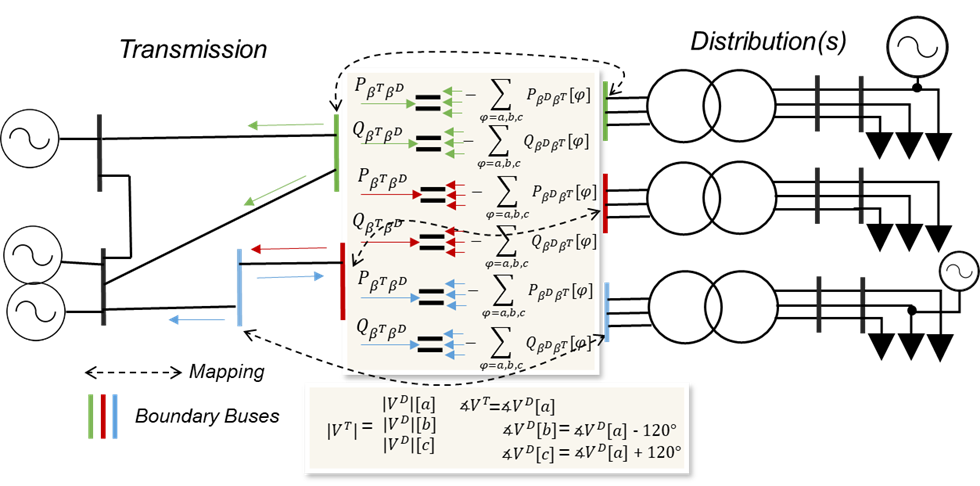

The figure above depicts the ACP-ACPU formulation mapping between the single-phase transmission system buses and the three-phase distribution system nodes at the T&D boundaries. As seen in the figure, the voltage constraints enforce the mathematical mapping of the boundary buses, and the power flow
constraints ensure that the power coming from the transmission system boundary bus is equal to the power flowing towards the rest of the distribution system.


### Let's import PowerModelsITD and parse the files we want to solve

Here, you can see that it will be very similar to how `PowerModels` and `PowerModelsDistribution` work, with the addition of having to parse the **boundary** information file.

In this example, we want to solve the integrated T&D optimal power flow (opfitd) problem for a case where we have the PJM 5-bus system (`case5_withload`) as the transmission system and the IEEE 4 Node Test Feeder (`case3_unbalanced.dss`) as the distribution system. The boundary information that specifies the respective boundary buses for both the transmission and distribution systems can be found in `case5_case3_unbal.json`.

The formulation used to solve this optimization problem is the **ACP-ACPU** (i.e., AC polar for transmission and AC polar unbalanced for distribution systems) formulation.

**Note**: All files used here can be found in the PowerModelsITD [test/data](https://github.com/lanl-ansi/PowerModelsITD.jl/tree/main/test/data) folder.

In [34]:
using PowerModelsITD

# Define the path to be the PowerModelsITD path (optional)
files_path = joinpath(dirname(pathof(PowerModelsITD)), "..")

# Transmission system file
pm_file = joinpath(files_path, "test/data/transmission/case5_withload.m")

# Distribution system file
pmd_file = joinpath(files_path, "test/data/distribution/case3_unbalanced.dss")

# Boundary information file
boundary_file = joinpath(files_path, "test/data/json/case5_case3_unbal.json")

# parse the files into dictionary
data = PowerModelsITD.parse_files(pm_file, pmd_file, boundary_file)

[ PowerModelsDistribution | Info ] : basemva=100 is the default value, you may want to adjust sbase_default for better convergence


Dict{String, Any} with 3 entries:
  "multiinfrastructure" => true
  "it"                  => Dict{String, Any}("pmd"=>Dict{String, Any}("conducto…
  "per_unit"            => false

In this case, we need to access the information of the system(s) through the `it` dictionary key, for example:

In [35]:
data["it"]

Dict{String, Any} with 3 entries:
  "pmd"   => Dict{String, Any}("conductor_ids"=>[1, 2, 3, 4], "bus"=>Dict{Any, …
  "pm"    => Dict{String, Any}("bus"=>Dict{String, Any}("4"=>Dict{String, Any}(…
  "pmitd" => Dict{String, Any}("100001"=>Dict{String, Any}("distribution_bounda…

Inside the `"pm"` key, we find the information related to the **transmission system**.

In [36]:
data["it"]["pm"]

Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "case5"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("pg"=>0.0, "mode…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.00108,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100.0
  "per_unit"       => true
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [37]:
data["it"]["pm"]["bus"]

Dict{String, Any} with 6 entries:
  "4"  => Dict{String, Any}("zone"=>1, "bus_i"=>4, "bus_type"=>3, "vmax"=>1.1, …
  "1"  => Dict{String, Any}("zone"=>1, "bus_i"=>1, "bus_type"=>2, "vmax"=>1.1, …
  "5"  => Dict{String, Any}("zone"=>1, "bus_i"=>5, "bus_type"=>1, "vmax"=>1.1, …
  "2"  => Dict{String, Any}("zone"=>1, "bus_i"=>2, "bus_type"=>1, "vmax"=>1.1, …
  "10" => Dict{String, Any}("zone"=>1, "bus_i"=>10, "bus_type"=>2, "vmax"=>1.1,…
  "3"  => Dict{String, Any}("zone"=>1, "bus_i"=>3, "bus_type"=>2, "vmax"=>1.1, …

Inside the `"pmd"` key, we find the  information related to the **distribution systems**. All of the distribution systems. 
- _Note_: Each element name has the format `name_of_distro_system.element_name`.


In [38]:
data["it"]["pmd"]

Dict{String, Any} with 13 entries:
  "conductor_ids"  => [1, 2, 3, 4]
  "bus"            => Dict{Any, Any}("3bus_unbal.loadbus"=>Dict{String, Any}("r…
  "name"           => "3bus_unbal"
  "ckt_names"      => ["3bus_unbal"]
  "settings"       => Dict{String, Any}("sbase_default"=>100000.0, "vbases_defa…
  "files"          => ["/Users/dfobes/.julia/packages/PowerModelsITD/09MN1/src/…
  "generator"      => Dict{Any, Any}("3bus_unbal.gen1"=>Dict{String, Any}("vg"=…
  "voltage_source" => Dict{Any, Any}("3bus_unbal.source"=>Dict{String, Any}("so…
  "line"           => Dict{Any, Any}("3bus_unbal.quad"=>Dict{String, Any}("leng…
  "data_model"     => ENGINEERING
  "transformer"    => Dict{Any, Any}("3bus_unbal.subxf"=>Dict{String, Any}("pol…
  "load"           => Dict{Any, Any}("3bus_unbal.l2"=>Dict{String, Any}("model"…
  "linecode"       => Dict{Any, Any}("3bus_unbal.4/0quad"=>Dict{String, Any}("b…

In [39]:
data["it"]["pmd"]["bus"]

Dict{Any, Any} with 4 entries:
  "3bus_unbal.loadbus"    => Dict{String, Any}("rg"=>[0.0], "grounded"=>[4], "s…
  "3bus_unbal.substation" => Dict{String, Any}("rg"=>[0.0], "grounded"=>[4], "s…
  "3bus_unbal.primary"    => Dict{String, Any}("rg"=>Float64[], "grounded"=>Int…
  "3bus_unbal.sourcebus"  => Dict{String, Any}("rg"=>[0.0], "grounded"=>[4], "s…

Inside the `"pmitd"` key, we find the information related to the **boundary(ies)**
- _Note_: Each **boundary** is numbered starting from "100001" to .....

In [40]:
data["it"]["pmitd"]

Dict{String, Any} with 1 entry:
  "100001" => Dict{String, Any}("distribution_boundary"=>"3bus_unbal.voltage_so…

In [41]:
data["it"]["pmitd"]["100001"]

Dict{String, Any} with 2 entries:
  "distribution_boundary" => "3bus_unbal.voltage_source.source"
  "transmission_boundary" => "5"

### Now, let's solve the T&D Optimal Power Flow (OPFITD) for this problem 

This will solve the OPFITD, optimal power flow for integrated transmission-distribution system

<span style="color:red">**NOTE**: _If you get an error, try reparsing the data. This issue happens because after the problem is solved, the `data` structure is modified and affects re-running the problem again. That is why you need to re-parse the file_.</span>.

In [42]:
using Ipopt

# Re-parse data to avoid errors
data = PowerModelsITD.parse_files(pm_file, pmd_file, boundary_file)

# Define T&D formulation to use
formulation = PowerModelsITD.NLPowerModelITD{ACPPowerModel, ACPUPowerModel}

# solver
ipopt_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 3)

# solve the opf itd optimization problem
result = solve_opfitd(data, formulation, ipopt_solver)

Total number of variables............................:      211
                     variables with only lower bounds:       27
                variables with lower and upper bounds:       71
                     variables with only upper bounds:        0
Total number of equality constraints.................:      199
Total number of inequality constraints...............:       69
        inequality constraints with only lower bounds:       18
   inequality constraints with lower and upper bounds:        7
        inequality constraints with only upper bounds:       44


Number of Iterations....: 24

                                   (scaled)                 (unscaled)
Objective...............:   4.4884366280124215e+02    1.7953746512049685e+04
Dual infeasibility......:   7.9856407667097663e-10    3.1942563066839065e-08
Constraint violation....:   3.9849375691553443e-14    5.8670117375481112e-12
Variable bound violation:   3.0132552453210337e-08    3.0132552453210337e-08
Complementari

[ PowerModelsDistribution | Info ] : basemva=100 is the default value, you may want to adjust sbase_default for better convergence
[ PowerModelsITD | Info ] : pmitd model solution time (instantiate + optimization): 5.668787002563477


Dict{String, Any} with 8 entries:
  "solve_time"         => 0.0237119
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 17953.7
  "solution"           => Dict{String, Any}("multiinfrastructure"=>true, "it"=>…
  "objective_lb"       => -Inf

#### Let's check the results

In [43]:
@info "Objective: $(result["objective"]) [\$/hr]"

[ Main | Info ] : Objective: 17953.746512049685 [$/hr]


In [44]:
@info "Termination Status of Solver: $(result["termination_status"])"

[ Main | Info ] : Termination Status of Solver: LOCALLY_SOLVED


In [45]:
@info "Solve Time: $(result["solve_time"]) [seconds]"

[ Main | Info ] : Solve Time: 0.0237119197845459 [seconds]


##### Solution Values for Transmission system

In [46]:
# Buses
result["solution"]["it"]["pm"]["bus"]

Dict{String, Any} with 6 entries:
  "4"  => Dict{String, Any}("va"=>-9.66631e-28, "vm"=>0.9)
  "1"  => Dict{String, Any}("va"=>3.95571, "vm"=>0.917815)
  "5"  => Dict{String, Any}("va"=>-0.803612, "vm"=>0.940088)
  "2"  => Dict{String, Any}("va"=>-0.656332, "vm"=>0.941632)
  "10" => Dict{String, Any}("va"=>5.01851, "vm"=>0.904864)
  "3"  => Dict{String, Any}("va"=>-0.312228, "vm"=>0.967094)

In [47]:
# Branches
result["solution"]["it"]["pm"]["branch"]

Dict{String, Any} with 7 entries:
  "4" => Dict{String, Any}("qf"=>-215.457, "qt"=>220.015, "pt"=>72.7277, "pf"=>…
  "1" => Dict{String, Any}("qf"=>-91.9458, "qt"=>113.049, "pt"=>-235.968, "pf"=…
  "5" => Dict{String, Any}("qf"=>71.3753, "qt"=>-69.0087, "pt"=>57.0431, "pf"=>…
  "2" => Dict{String, Any}("qf"=>40.8275, "qt"=>-27.519, "pt"=>-190.173, "pf"=>…
  "6" => Dict{String, Any}("qf"=>19.2895, "qt"=>1.0554, "pt"=>239.998, "pf"=>-2…
  "7" => Dict{String, Any}("qf"=>3.79799, "qt"=>-4.36718, "pt"=>-8.06845, "pf"=…
  "3" => Dict{String, Any}("qf"=>208.618, "qt"=>-204.199, "pt"=>220.4, "pf"=>-2…

In [48]:
# Generators
result["solution"]["it"]["pm"]["gen"]

Dict{String, Any} with 5 entries:
  "4" => Dict{String, Any}("qg"=>54.2318, "pg"=>18.9614)
  "1" => Dict{String, Any}("qg"=>30.0, "pg"=>40.0)
  "5" => Dict{String, Any}("qg"=>-203.144, "pg"=>460.398)
  "2" => Dict{String, Any}("qg"=>127.5, "pg"=>170.0)
  "3" => Dict{String, Any}("qg"=>390.0, "pg"=>315.977)

##### Solution Values for Distribution system(s)

In [49]:
# Buses/Nodes
result["solution"]["it"]["pmd"]["bus"]

Dict{String, Any} with 4 entries:
  "3bus_unbal.loadbus"    => Dict{String, Any}("va"=>[-0.954285, -120.825, 119.…
  "3bus_unbal.substation" => Dict{String, Any}("va"=>[-0.808934, -120.807, 119.…
  "3bus_unbal.primary"    => Dict{String, Any}("va"=>[-0.877214, -120.816, 119.…
  "3bus_unbal.sourcebus"  => Dict{String, Any}("va"=>[-0.80642, -120.806, 119.1…

In [50]:
# Lines (i.e., branches)
result["solution"]["it"]["pmd"]["line"]

Dict{String, Any} with 2 entries:
  "3bus_unbal.quad"   => Dict{String, Any}("qf"=>[1344.78, 1503.94, 1502.44], "…
  "3bus_unbal.ohline" => Dict{String, Any}("qf"=>[1354.62, 1507.23, 1504.47], "…

In [51]:
# Generators (DG1)
result["solution"]["it"]["pmd"]["generator"]["3bus_unbal.gen1"]

Dict{String, Any} with 4 entries:
  "qg_bus" => [-0.0, -0.0, -0.0]
  "qg"     => [-0.0, -0.0, -0.0]
  "pg"     => [666.668, 666.668, 666.668]
  "pg_bus" => [666.668, 666.668, 666.668]

In [52]:
# Loads
result["solution"]["it"]["pmd"]["load"]

Dict{String, Any} with 3 entries:
  "3bus_unbal.l2" => Dict{String, Any}("qd_bus"=>[1500.0], "pd_bus"=>[3000.0], …
  "3bus_unbal.l3" => Dict{String, Any}("qd_bus"=>[1500.0], "pd_bus"=>[3000.0], …
  "3bus_unbal.l1" => Dict{String, Any}("qd_bus"=>[1333.33], "pd_bus"=>[4000.0],…

##### Solution Values for Boundary(ies) (T&D interconnection)

In [53]:
# Boundary - Transmission (Bus #5) to Distribution (3bus_unbal)
result["solution"]["it"]["pmitd"]["boundary"]["(100001, 5, voltage_source.3bus_unbal.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [8068.45]
  "qbound_fr" => [4367.18]

In [54]:
# Boundary - Distribution (3bus_unbal) to Transmission (Bus #5)
result["solution"]["it"]["pmitd"]["boundary"]["(100001, voltage_source.3bus_unbal.source, 5)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-3367.19, -2346.4, -2354.86]
  "qbound_to" => [-1355.01, -1507.47, -1504.7]

# --------------------------------
<span style="color:red">**IMPORTANT!**</span>

The values with a key name ending in `..._fr` represent the powers flowing from the Transmission to the Distribution. The values ending in `...to` represent the powers flowing from the Distribution to the Transmission (that's why they are negative). For the Distribution values, they represent `[phase A, phase B, phase C]`. The summation of all elements in the `to` vectors must be equal to the value in `fr`. The summation must be multiplied by $\times$ -1 to make it positive.

# --------------------------------

### Let's solve a Multinetwork (Time-series) Multisystem (Multiple Distribution Systems) OPFITD

In this example case, we want to solve the integrated T&D optimal power flow (opfitd) problem for a Multinetwork case where we have the PJM 5-bus system (`case5_with2loads.m`) as the transmission system and two copies of the IEEE 4 Node Test Feeder (`case3_unbalanced_withoutgen_mn.dss`) as the distribution systems, where each distribution system has load profiles for their respective loads for **four timesteps**. The boundary information that specifies the respective boundary buses for both the transmission and distribution systems can be found in `case5_case3x2.json`.

**Note**: The key `nw` means `network`. The term `multinetwork` is a generalization of `timeseries`, since each timestep in the timeseries can be considered a _different_ network.


In [55]:
using PowerModelsITD
using Ipopt

# solver
ipopt_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 3)

PowerModelsITD.silence!()  # Silences the console, so warning messages or information are not displayed

files_path = joinpath(dirname(pathof(PowerModelsITD)), "..")                                    # file path for test cases files
pm_file = joinpath(files_path, "test/data/transmission/case5_with2loads.m")                     # transmission system file
pmd_file1 = joinpath(files_path, "test/data/distribution/case3_unbalanced_withoutgen_mn.dss")    # distribution system file 1
pmd_file2 = joinpath(files_path, "test/data/distribution/case3_unbalanced_withoutgen_mn_diff.dss")    # distribution system file 2
boundary_file = joinpath(files_path, "test/data/json/case5_case3x2.json")                       # boundary file with info. about boundary buses
pmd_files = [pmd_file1, pmd_file2]                                                                # vector of distrib. systems (in this case a copy of the same)

# type of formulation to be used
formulation = PowerModelsITD.NLPowerModelITD{ACPPowerModel, ACPUPowerModel}

# solve the multinetwork opfitd
result = PowerModelsITD.solve_mn_opfitd(pm_file, pmd_files, boundary_file, formulation, ipopt_solver; auto_rename=true)

┌ PowerModelsITD | Warning ] : Suppressing information and warning messages output by PowerModels and PowerModelsDistribution for the rest of this session.
└ @ PowerModelsITD ~/.julia/packages/PowerModelsITD/09MN1/src/PowerModelsITD.jl:18
┌ PowerModelsITD | Warning ] : auto_rename option is true, so boundary names in 'pmitd=>' will be overwritten sequentially and may not represent the actual wanted boundary connections.
└ @ PowerModelsITD ~/.julia/packages/PowerModelsITD/09MN1/src/core/helpers.jl:107


Total number of variables............................:     1488
                     variables with only lower bounds:      216
                variables with lower and upper bounds:      388
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1452
Total number of inequality constraints...............:      480
        inequality constraints with only lower bounds:      144
   inequality constraints with lower and upper bounds:       32
        inequality constraints with only upper bounds:      304


Number of Iterations....: 24

                                   (scaled)                 (unscaled)
Objective...............:   1.7971067692666493e+03    7.1884270770665971e+04
Dual infeasibility......:   8.1648649495225114e-10    3.2659459798090046e-08
Constraint violation....:   5.0333644883944543e-14    6.0395854983852360e-12
Variable bound violation:   3.0073922019369093e-08    3.0073922019369093e-08
Complementari

[ PowerModelsITD | Info ] : pmitd model solution time (instantiate + optimization): 0.6272449493408203


Dict{String, Any} with 8 entries:
  "solve_time"         => 0.148122
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 71884.3
  "solution"           => Dict{String, Any}("multiinfrastructure"=>true, "it"=>…
  "objective_lb"       => -Inf

In [56]:
@info "Objective: $(result["objective"]) [\$/hr]"

[ Main | Info ] : Objective: 71884.27077066597 [$/hr]


In [57]:
@info "Termination Status of Solver: $(result["termination_status"])"

[ Main | Info ] : Termination Status of Solver: LOCALLY_SOLVED


In [58]:
@info "Solve Time: $(result["solve_time"]) [seconds]"

[ Main | Info ] : Solve Time: 0.14812207221984863 [seconds]


##### Solution Values for Transmission system

In [59]:
# Buses of timestep 1 in the timeseries
result["solution"]["it"]["pm"]["nw"]["1"]["bus"]

Dict{String, Any} with 7 entries:
  "4"  => Dict{String, Any}("va"=>1.77189e-30, "vm"=>0.9)
  "1"  => Dict{String, Any}("va"=>3.95511, "vm"=>0.91789)
  "5"  => Dict{String, Any}("va"=>-0.769599, "vm"=>0.94138)
  "2"  => Dict{String, Any}("va"=>-0.65741, "vm"=>0.94211)
  "6"  => Dict{String, Any}("va"=>-0.825474, "vm"=>0.940969)
  "10" => Dict{String, Any}("va"=>5.01852, "vm"=>0.904864)
  "3"  => Dict{String, Any}("va"=>-0.327076, "vm"=>0.967421)

In [60]:
# Buses of timestep 2 in the timeseries
result["solution"]["it"]["pm"]["nw"]["2"]["bus"]

Dict{String, Any} with 7 entries:
  "4"  => Dict{String, Any}("va"=>-2.34906e-30, "vm"=>0.9)
  "1"  => Dict{String, Any}("va"=>3.95596, "vm"=>0.91792)
  "5"  => Dict{String, Any}("va"=>-0.72648, "vm"=>0.941916)
  "2"  => Dict{String, Any}("va"=>-0.651197, "vm"=>0.942305)
  "6"  => Dict{String, Any}("va"=>-0.745434, "vm"=>0.941844)
  "10" => Dict{String, Any}("va"=>5.01854, "vm"=>0.904862)
  "3"  => Dict{String, Any}("va"=>-0.332464, "vm"=>0.967549)

In [61]:
# Buses of timestep 3 in the timeseries
result["solution"]["it"]["pm"]["nw"]["3"]["bus"]

Dict{String, Any} with 7 entries:
  "4"  => Dict{String, Any}("va"=>2.90557e-31, "vm"=>0.9)
  "1"  => Dict{String, Any}("va"=>3.95345, "vm"=>0.917828)
  "5"  => Dict{String, Any}("va"=>-0.856195, "vm"=>0.940291)
  "2"  => Dict{String, Any}("va"=>-0.669593, "vm"=>0.941712)
  "6"  => Dict{String, Any}("va"=>-0.986678, "vm"=>0.939193)
  "10" => Dict{String, Any}("va"=>5.01847, "vm"=>0.904867)
  "3"  => Dict{String, Any}("va"=>-0.315789, "vm"=>0.967162)

In [62]:
# Buses of timestep 4 in the timeseries
result["solution"]["it"]["pm"]["nw"]["4"]["bus"]

Dict{String, Any} with 7 entries:
  "4"  => Dict{String, Any}("va"=>1.0386e-28, "vm"=>0.9)
  "1"  => Dict{String, Any}("va"=>3.95146, "vm"=>0.917749)
  "5"  => Dict{String, Any}("va"=>-0.965128, "vm"=>0.938896)
  "2"  => Dict{String, Any}("va"=>-0.684337, "vm"=>0.941203)
  "6"  => Dict{String, Any}("va"=>-1.19036, "vm"=>0.936924)
  "10" => Dict{String, Any}("va"=>5.01842, "vm"=>0.904872)
  "3"  => Dict{String, Any}("va"=>-0.300677, "vm"=>0.96683)

In [63]:
# Generators of timestep 1 in the timeseries
result["solution"]["it"]["pm"]["nw"]["1"]["gen"]

Dict{String, Any} with 5 entries:
  "4" => Dict{String, Any}("qg"=>53.0206, "pg"=>19.5984)
  "1" => Dict{String, Any}("qg"=>30.0, "pg"=>40.0)
  "5" => Dict{String, Any}("qg"=>-204.204, "pg"=>460.449)
  "2" => Dict{String, Any}("qg"=>127.5, "pg"=>170.0)
  "3" => Dict{String, Any}("qg"=>390.0, "pg"=>313.247)

In [64]:
# Generators of timestep 2 in the timeseries
result["solution"]["it"]["pm"]["nw"]["2"]["gen"]

Dict{String, Any} with 5 entries:
  "4" => Dict{String, Any}("qg"=>52.5589, "pg"=>19.7762)
  "1" => Dict{String, Any}("qg"=>30.0, "pg"=>40.0)
  "5" => Dict{String, Any}("qg"=>-204.645, "pg"=>460.225)
  "2" => Dict{String, Any}("qg"=>127.5, "pg"=>170.0)
  "3" => Dict{String, Any}("qg"=>390.0, "pg"=>311.283)

##### Solution Values for Distribution system(s)

In [65]:
# Buses of timestep 1 in the timeseries
result["solution"]["it"]["pmd"]["nw"]["1"]["bus"]

Dict{String, Any} with 8 entries:
  "3bus_unbal_nogen_mn_diff.substation" => Dict{String, Any}("va"=>[-0.827403, …
  "3bus_unbal_nogen_mn_diff.sourcebus"  => Dict{String, Any}("va"=>[-0.826499, …
  "3bus_unbal_nogen_mn.primary"         => Dict{String, Any}("va"=>[-0.799141, …
  "3bus_unbal_nogen_mn.sourcebus"       => Dict{String, Any}("va"=>[-0.770623, …
  "3bus_unbal_nogen_mn.loadbus"         => Dict{String, Any}("va"=>[-0.83023, -…
  "3bus_unbal_nogen_mn_diff.primary"    => Dict{String, Any}("va"=>[-0.855042, …
  "3bus_unbal_nogen_mn.substation"      => Dict{String, Any}("va"=>[-0.771526, …
  "3bus_unbal_nogen_mn_diff.loadbus"    => Dict{String, Any}("va"=>[-0.886158, …

In [66]:
# Buses of timestep 2 in the timeseries
result["solution"]["it"]["pmd"]["nw"]["2"]["bus"]

Dict{String, Any} with 8 entries:
  "3bus_unbal_nogen_mn_diff.substation" => Dict{String, Any}("va"=>[-0.746074, …
  "3bus_unbal_nogen_mn_diff.sourcebus"  => Dict{String, Any}("va"=>[-0.745774, …
  "3bus_unbal_nogen_mn.primary"         => Dict{String, Any}("va"=>[-0.755989, …
  "3bus_unbal_nogen_mn.sourcebus"       => Dict{String, Any}("va"=>[-0.727503, …
  "3bus_unbal_nogen_mn.loadbus"         => Dict{String, Any}("va"=>[-0.787042, …
  "3bus_unbal_nogen_mn_diff.primary"    => Dict{String, Any}("va"=>[-0.75533, -…
  "3bus_unbal_nogen_mn.substation"      => Dict{String, Any}("va"=>[-0.728405, …
  "3bus_unbal_nogen_mn_diff.loadbus"    => Dict{String, Any}("va"=>[-0.765676, …

In [67]:
# Buses of timestep 3 in the timeseries
result["solution"]["it"]["pmd"]["nw"]["3"]["bus"]

Dict{String, Any} with 8 entries:
  "3bus_unbal_nogen_mn_diff.substation" => Dict{String, Any}("va"=>[-0.991215, …
  "3bus_unbal_nogen_mn_diff.sourcebus"  => Dict{String, Any}("va"=>[-0.989088, …
  "3bus_unbal_nogen_mn.primary"         => Dict{String, Any}("va"=>[-0.885806, …
  "3bus_unbal_nogen_mn.sourcebus"       => Dict{String, Any}("va"=>[-0.857221, …
  "3bus_unbal_nogen_mn.loadbus"         => Dict{String, Any}("va"=>[-0.916966, …
  "3bus_unbal_nogen_mn_diff.primary"    => Dict{String, Any}("va"=>[-1.05591, -…
  "3bus_unbal_nogen_mn.substation"      => Dict{String, Any}("va"=>[-0.858127, …
  "3bus_unbal_nogen_mn_diff.loadbus"    => Dict{String, Any}("va"=>[-1.1292, -1…

In [68]:
# Buses of timestep 4 in the timeseries
result["solution"]["it"]["pmd"]["nw"]["4"]["bus"]

Dict{String, Any} with 8 entries:
  "3bus_unbal_nogen_mn_diff.substation" => Dict{String, Any}("va"=>[-1.19822, -…
  "3bus_unbal_nogen_mn_diff.sourcebus"  => Dict{String, Any}("va"=>[-1.19454, -…
  "3bus_unbal_nogen_mn.primary"         => Dict{String, Any}("va"=>[-0.994826, …
  "3bus_unbal_nogen_mn.sourcebus"       => Dict{String, Any}("va"=>[-0.966157, …
  "3bus_unbal_nogen_mn.loadbus"         => Dict{String, Any}("va"=>[-1.02608, -…
  "3bus_unbal_nogen_mn_diff.primary"    => Dict{String, Any}("va"=>[-1.30979, -…
  "3bus_unbal_nogen_mn.substation"      => Dict{String, Any}("va"=>[-0.967065, …
  "3bus_unbal_nogen_mn_diff.loadbus"    => Dict{String, Any}("va"=>[-1.43704, -…

##### Solution Values for Boundary(ies) (T&D interconnection)

###### ------ Boundary #1 ------

In [69]:
# Boundary #1 flows from Transmission (Bus #5) to Distribution (3bus_unbal_nogen_mn) for timestep 1 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["1"]["boundary"]["(100001, 5, voltage_source.3bus_unbal_nogen_mn.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [3008.59]
  "qbound_fr" => [1298.59]

In [70]:
# Boundary #1 flows from Distribution (3bus_unbal_nogen_mn) to Transmission (Bus #5) for timestep 1 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["1"]["boundary"]["(100001, voltage_source.3bus_unbal_nogen_mn.source, 5)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-1204.1, -901.808, -902.676]
  "qbound_to" => [-400.626, -449.175, -448.787]

In [71]:
# Boundary #1 flows from Transmission (Bus #5) to Distribution (3bus_unbal_nogen_mn) for timestep 2 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["2"]["boundary"]["(100001, 5, voltage_source.3bus_unbal_nogen_mn.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [3008.58]
  "qbound_fr" => [1298.57]

In [72]:
# Boundary #1 flows from Distribution (3bus_unbal_nogen_mn) to Transmission (Bus #5) for timestep 2 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["2"]["boundary"]["(100001, voltage_source.3bus_unbal_nogen_mn.source, 5)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-1204.1, -901.806, -902.673]
  "qbound_to" => [-400.62, -449.171, -448.784]

###### ------ Boundary #2 ------

In [73]:
# Boundary #2 flows from Transmission (Bus #6) to Distribution (3bus_unbal_nogen_mn_diff) for timestep 1 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["1"]["boundary"]["(100002, 6, voltage_source.3bus_unbal_nogen_mn_diff.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [3008.59]
  "qbound_fr" => [1298.6]

In [74]:
# Boundary #2 flows from Distribution (3bus_unbal_nogen_mn_diff) to Transmission (Bus #6) for timestep 1 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["1"]["boundary"]["(100002, voltage_source.3bus_unbal_nogen_mn_diff.source, 6)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-1204.1, -901.81, -902.678]
  "qbound_to" => [-400.63, -449.178, -448.79]

In [75]:
# Boundary #2 flows from Transmission (Bus #6) to Distribution (3bus_unbal_nogen_mn_diff) for timestep 2 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["2"]["boundary"]["(100002, 6, voltage_source.3bus_unbal_nogen_mn_diff.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [1000.95]
  "qbound_fr" => [427.41]

In [76]:
# Boundary #2 flows from Distribution (3bus_unbal_nogen_mn_diff) to Transmission (Bus #6) for timestep 2 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["2"]["boundary"]["(100002, voltage_source.3bus_unbal_nogen_mn_diff.source, 6)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-400.452, -300.2, -300.295]
  "qbound_to" => [-131.48, -147.986, -147.944]

In [77]:
# Boundary #2 flows from Transmission (Bus #6) to Distribution (3bus_unbal_nogen_mn_diff) for timestep 3 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["3"]["boundary"]["(100002, 6, voltage_source.3bus_unbal_nogen_mn_diff.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [7047.38]
  "qbound_fr" => [3054.79]

In [78]:
# Boundary #2 flows from Distribution (3bus_unbal_nogen_mn_diff) to Transmission (Bus #6) for timestep 3 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["3"]["boundary"]["(100002, voltage_source.3bus_unbal_nogen_mn_diff.source, 6)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-2822.68, -2109.95, -2114.75]
  "qbound_to" => [-946.558, -1055.2, -1053.04]

In [79]:
# Boundary #2 flows from Transmission (Bus #6) to Distribution (3bus_unbal_nogen_mn_diff) for timestep 4 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["4"]["boundary"]["(100002, 6, voltage_source.3bus_unbal_nogen_mn_diff.source)"]

Dict{String, Any} with 2 entries:
  "pbound_fr" => [12141.4]
  "qbound_fr" => [5276.86]

In [80]:
# Boundary #2 flows from Distribution (3bus_unbal_nogen_mn_diff) to Transmission (Bus #6) for timestep 4 of the timeseries
result["solution"]["it"]["pmitd"]["nw"]["4"]["boundary"]["(100002, voltage_source.3bus_unbal_nogen_mn_diff.source, 6)"]

Dict{String, Any} with 2 entries:
  "pbound_to" => [-4867.93, -3629.56, -3643.95]
  "qbound_to" => [-1643.84, -1819.75, -1813.27]

### -----------------------------------------------------------------------------------------------------------
### QUIZ #3: let's solve the Optimal Power Flow ITD (OPFITD) using different formulations and compute optimality gaps.

Let's solve the OPF using other formulations:

- `ACRPowerModel-ACRUPowerModel` (NLP) -- AC rectangular coordinates --> `NLPowerModelITD{ACRPowerModel, ACRUPowerModel}`
- `BFAPowerModel-LinDist3FlowPowerModel` (APPROXIMATION) -- Branch flow - LindDist3Flow approximation --> `BFPowerModelITD{BFAPowerModel, LinDist3FlowPowerModel}`
- `NFAPowerModel-NFAUPowerModel` (APPROXIMATION) -- Network flow approximation -->  `LPowerModelITD{NFAPowerModel, NFAUPowerModel}`
- `IVRPowerModel-IVRUPowerModel` (NLP) -- Current-Voltage rectangular coordinates --> `IVRPowerModelITD{IVRPowerModel, IVRUPowerModel}`

**Note**: the optimality gap is normally used to compare NLPs with approximations/relaxations. NLPs vs NLPs should give a value close to 0.0%

**Note 2**: Make sure that the solver terminates nominally!, i.e., `result["termination_status"] == OPTIMAL` ||  `result["termination_status"] == LOCALLY_SOLVED`)

I will provide an example below between **ACP-ACPU vs. ACR-ACRU**

See all currently supported formulations [here](https://lanl-ansi.github.io/PowerModelsITD.jl/stable/manual/quickguide.html#Accessing-Different-Formulations) or [here](https://lanl-ansi.github.io/PowerModelsITD.jl/stable/manual/formulations.html)

In [81]:
# solver
ipopt_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0)

# Define the path to be the PowerModels path (optional)
files_path = joinpath(dirname(pathof(PowerModelsITD)), "..")
pm_file = joinpath(files_path, "test/data/transmission/case5_withload.m")
pmd_file = joinpath(files_path, "test/data/distribution/case3_unbalanced.dss")
boundary_file = joinpath(files_path, "test/data/json/case5_case3_unbal.json")

# Base nlp to compare
formulation = PowerModelsITD.NLPowerModelITD{ACPPowerModel, ACPUPowerModel} ## Formulation!!!
data_nlp = PowerModelsITD.parse_files(pm_file, pmd_file, boundary_file)
result_nlp = solve_opfitd(data_nlp, formulation, ipopt_solver)
@info "NLP: $(result_nlp["objective"])"
@info "NLP: $(result_nlp["termination_status"])"

# Approx. or Relax. to compare (in this case is another nlp formulation)
formulation = PowerModelsITD.NLPowerModelITD{ACRPowerModel, ACRUPowerModel} ## Formulation!!!
data_relax = PowerModelsITD.parse_files(pm_file, pmd_file, boundary_file)
result_relax = solve_opfitd(data_relax, formulation, ipopt_solver)
@info "RELAX: $(result_relax["objective"])"
@info "RELAX: $(result_relax["termination_status"])"

op_gap = optimality_gap(result_nlp, result_relax) # result is in %

@info "Optimality Gap: $(op_gap) %"

[ PowerModelsITD | Info ] : pmitd model solution time (instantiate + optimization): 0.03621315956115723
[ Main | Info ] : NLP: 17953.746512049685
[ Main | Info ] : NLP: LOCALLY_SOLVED
[ PowerModelsITD | Info ] : pmitd model solution time (instantiate + optimization): 1.876512050628662
[ Main | Info ] : RELAX: 17953.746516911073
[ Main | Info ] : RELAX: LOCALLY_SOLVED
[ Main | Info ] : Optimality Gap: -2.7077286742954975e-8 %


## Other Test Cases

You can find other test cases to run and experiment in the [Beginners Guide of PowerModelsITD](https://lanl-ansi.github.io/PowerModelsITD.jl/stable/tutorials/BeginnersGuide.html)